**`Análisis exploratorio de los datos`**: _(Exploratory Data Analysis-EDA)_

Primero importamos las librerias que  vamos a necesitar

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

Cargamos los archivos .csv a los que ya se les aplico las transformaciones

In [15]:
df_amazon_prime = pd.read_csv('../dataset_ETL/amazon_prime_ETL.csv', delimiter = ',',encoding = "utf-8")
df_disney_plus = pd.read_csv('../dataset_ETL/disney_plus_ETL.csv',delimiter= ',', encoding = "utf-8" )
df_hulu = pd.read_csv('../dataset_ETL/hulu_ETL.csv',delimiter= ',', encoding = "utf-8" )
df_netflix = pd.read_csv('../dataset_ETL/netflix_ETL.csv',delimiter= ',', encoding = "utf-8" )

In [ ]:
#cargar los ritings

Se corre un sample en cada dataframe para ver que tipo de datos hay

In [ ]:
df_amazon_prime.sample(20)

In [ ]:
df_disney_plus.sample(20)

In [ ]:
df_hulu.sample(20)

In [ ]:
df_netflix.sample(20)

Observamos la informacion detallada de cada dataframe

In [50]:
df_amazon_prime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9668 entries, 0 to 9667
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   show_id        9668 non-null   object
 1   type           9668 non-null   object
 2   title          9668 non-null   object
 3   director       7586 non-null   object
 4   cast           8435 non-null   object
 5   country        672 non-null    object
 6   date_added     155 non-null    object
 7   release_year   9668 non-null   int64 
 8   rating         9668 non-null   object
 9   duration       9668 non-null   object
 10  listed_in      9668 non-null   object
 11  description    9668 non-null   object
 12  id             9668 non-null   object
 13  duration_int   9668 non-null   int64 
 14  duration_type  9668 non-null   object
dtypes: int64(2), object(13)
memory usage: 1.1+ MB


In [ ]:
df_disney_plus.info()

In [ ]:
df_hulu.info()

In [ ]:
df_netflix.info()

Se analizaran los valores faltantes

In [ ]:
df_amazon_prime.isnull().sum()

In [ ]:
df_disney_plus.isnull().sum()

In [ ]:
df_hulu.isnull().sum()

In [ ]:
df_netflix.isnull().sum()

Se analizaran las columnas con valores numericos

TypeError: 'value' must be an instance of str or bytes, not a float

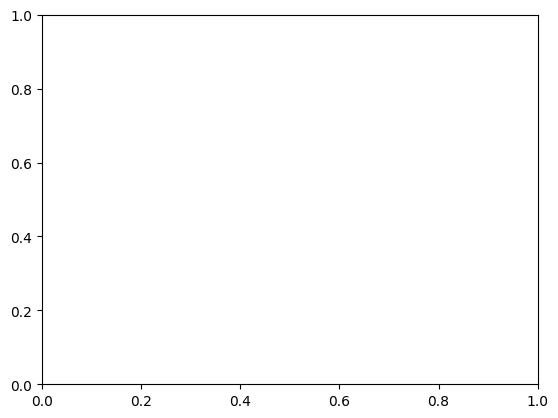

In [44]:
# crear el histograma
plt.hist(df_amazon_prime['date_added'], bins=50)
plt.title('Distribución de fechas de películas agregadas')
plt.xlabel('Fecha de agregado')
plt.ylabel('Número de películas')
plt.show()